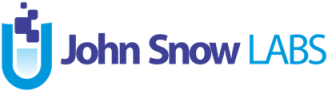

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/task-specific-notebooks/Translation_Notebook.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification, fill-mask, Translation model using the library. We also support testing LLMS for Question-Answering, Summarization and text-generation tasks on benchmark datasets. The library supports 60+ out of the box tests. For a complete list of supported test categories, please refer to the [documentation](http://langtest.org/docs/pages/docs/test_categories).

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install langtest[transformers]

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [2]:
# Import Harness from the LangTest library
from langtest import Harness

# Translation Testing with Hugging Face Models

In this section, we dive into testing translation models. We will use the Hugging Face Transformers library to load the translation models. We will use the Harness class to test the translation models. The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.


### Supported Datset : Translation

**Data Splits**

- `test`: contains 4400 samples.

### Setup and Configure Harness

In [3]:
harness = Harness(task="translation",
                  model={"model":'t5-base', "hub": "huggingface"},
                  data={"data_source": "Translation",
                        "split":"test"}
                  )

Test Configuration : 
 {
 "model_parameters": {
  "target_language": "fr"
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "uppercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


c:\Users\raksh\anaconda3\lib\site-packages\transformers\models\t5\tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


We have specified task as `translation` , hub as `huggingface` and model as `t5-base`



For tests we used lowercase and uppercase. Other available robustness tests are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`
* `strip_all_punctuation`

In [27]:
harness.configure(
    {
        'model_parameters': {'target_language': 'de'},
        'tests': {'defaults': {'min_pass_rate': 0.65},
                  'robustness': {'lowercase': {'min_pass_rate': 0.66},
                                 'uppercase': {'min_pass_rate': 0.66},
                                 }
                  }
    }
)

{'model_parameters': {'target_language': 'de'},
 'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'lowercase': {'min_pass_rate': 0.66},
   'uppercase': {'min_pass_rate': 0.66}}}}

Here we have configured the harness to perform two robustness tests (uppercase and lowercase) and defined the minimum pass rate for each test.

### Generating the test cases.

In [28]:
harness.data = harness.data[:8]

In [29]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 1974.72it/s]


harness.generate() method automatically generates the test cases (based on the provided configuration)

In [30]:
harness.testcases()

,category,test_type,original,test_case
0,robustness,lowercase,Are you coming back tomorrow?,are you coming back tomorrow?
1,robustness,lowercase,Are you ever wrong?,are you ever wrong?
2,robustness,lowercase,Are you going to ask her?,are you going to ask her?
3,robustness,lowercase,Are you guys all right?,are you guys all right?
4,robustness,lowercase,Are you in Bangladesh?,are you in bangladesh?
5,robustness,lowercase,Are you in London?,are you in london?
6,robustness,lowercase,Are you interested in flowers?,are you interested in flowers?
7,robustness,lowercase,Are you listening to the radio?,are you listening to the radio?
8,robustness,uppercase,Are you coming back tomorrow?,ARE YOU COMING BACK TOMORROW?
9,robustness,uppercase,Are you ever wrong?,ARE YOU EVER WRONG?


harness.testcases() method displays the produced test cases in form of a pandas data frame.

### Running the tests

In [31]:
harness.run()


Running testcases... :   0%|          | 0/16 [00:00<?, ?it/s]c:\Users\raksh\anaconda3\envs\jsl\Lib\site-packages\transformers\generation\utils.py:1219: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Running testcases... : 100%|██████████| 16/16 [00:21<00:00,  1.32s/it]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

In [35]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,eval_score,pass
0,robustness,lowercase,Are you coming back tomorrow?,are you coming back tomorrow?,Kommen Sie morgen zurück?,kehren Sie morgen zurück?,0.004109,True
1,robustness,lowercase,Are you ever wrong?,are you ever wrong?,Haben Sie sich jemals geirrt?,Sie irren sich jemals?,0.181412,False
2,robustness,lowercase,Are you going to ask her?,are you going to ask her?,Werden Sie sie fragen?,Werden Sie sie fragen?,0.000095,True
3,robustness,lowercase,Are you guys all right?,are you guys all right?,Ist es dir recht?,"ist es gut, wenn es jemanden gibt?",0.510261,False
4,robustness,lowercase,Are you in Bangladesh?,are you in bangladesh?,Sind Sie in Bangladesch?,sind Sie in bangladesh?,0.002919,True
5,robustness,lowercase,Are you in London?,are you in london?,Sind Sie in London?,sind Sie in London?,0.000939,True
6,robustness,lowercase,Are you interested in flowers?,are you interested in flowers?,Sie interessieren sich für Blumen?,interessieren Sie sich für Blumen?,0.042366,True
7,robustness,lowercase,Are you listening to the radio?,are you listening to the radio?,Hören Sie dem Radio zu?,Hören Sie dem Radio zu?,0.000069,True
8,robustness,uppercase,Are you coming back tomorrow?,ARE YOU COMING BACK TOMORROW?,Kommen Sie morgen zurück?,KOMMEN SIE TOMORROW HERZ?,0.227691,False
9,robustness,uppercase,Are you ever wrong?,ARE YOU EVER WRONG?,Haben Sie sich jemals geirrt?,IST SIE JEGLICHE WRONG?,0.462017,False


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [36]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,lowercase,2,6,75%,66%,True
1,robustness,uppercase,7,1,12%,66%,False


# Translation Testing with John Snow Labs Models

In [ ]:
!pip install johnsnowlabs

## 👷 Setting up  John Snow Labs

In [6]:
from johnsnowlabs import nlp
spark = nlp.start()

🤓 Looks like /root/.johnsnowlabs is missing, creating it
👷 Setting up  John Snow Labs home in /root/.johnsnowlabs, this might take a few minutes.
🙆 JSL Home setup in /root/.johnsnowlabs
👌 Launched cpu optimized session with with: 🚀Spark-NLP==4.4.1, running on ⚡ PySpark==3.1.2


## ⚡ Setting up Translation Pipeline

In [7]:
# spark = nlp.start()
documentAssembler = nlp.DocumentAssembler().setInputCol(
    "text").setOutputCol("document")

sentencerDL = nlp.SentenceDetectorDLModel.pretrained(
    "sentence_detector_dl", "xx").setInputCols(["document"]).setOutputCol("sentences")

marian = nlp.MarianTransformer.pretrained("opus_mt_en_sw", "xx").setInputCols([
    "sentences"]).setOutputCol("translation")

translation_pipeline = nlp.Pipeline().setStages([
    documentAssembler,
    sentencerDL,
    marian
])

translation_model = translation_pipeline.fit(
    spark.createDataFrame([[""]]).toDF("text"))


sentence_detector_dl download started this may take some time.
Approximate size to download 514.9 KB
[OK!]
opus_mt_en_sw download started this may take some time.
Approximate size to download 376.1 MB
[OK!]


In [10]:
harness = Harness(task="translation",
                  model={"model": translation_model, "hub": "johnsnowlabs"},
                  data={"data_source": "Translation",
                         "split":"test"}
                  )

Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "lowercase": {
    "min_pass_rate": 0.7
   },
   "uppercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [11]:
harness.data = harness.data[:10]

We can use the .configure() method to manually define our test configuration for the robustness tests.

In [12]:
harness.configure(
    {
        'tests': {'defaults': {'min_pass_rate': 0.65},
                  'robustness': {'lowercase': {'min_pass_rate': 0.66},
                                 'uppercase': {'min_pass_rate': 0.66},
                                 }
                  }
    }
)


{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'lowercase': {'min_pass_rate': 0.66},
   'uppercase': {'min_pass_rate': 0.66}}}}

Here we have configured the harness to perform two tests (uppercase and lowercase) and defined the minimum pass rate for each test.

### ⚙️ Generating the test cases.

In [13]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 5555.37it/s]


In [14]:
harness.testcases()

,category,test_type,original,test_case
0,robustness,lowercase,Absence of rain caused the plants to die.,absence of rain caused the plants to die.
1,robustness,lowercase,A button has come off my raincoat.,a button has come off my raincoat.
2,robustness,lowercase,A cat ran after a mouse.,a cat ran after a mouse.
3,robustness,lowercase,A clock has two hands.,a clock has two hands.
4,robustness,lowercase,A country is a dangerous machine.,a country is a dangerous machine.
5,robustness,lowercase,A crow is as black as coal.,a crow is as black as coal.
6,robustness,lowercase,Actinium was discovered by André-Louis Debiern...,actinium was discovered by andré-louis debiern...
7,robustness,lowercase,Add a little sugar and cream.,add a little sugar and cream.
8,robustness,lowercase,Adopt the pace of nature: her secret is patience.,adopt the pace of nature: her secret is patience.
9,robustness,lowercase,A fire broke out near my house.,a fire broke out near my house.


### ⏳ Running the tests.

In [15]:
harness.run()

Running testcases... : 100%|██████████| 20/20 [00:38<00:00,  1.94s/it]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### 🧾 Generated Results

In [16]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,eval_score,pass
0,robustness,lowercase,Absence of rain caused the plants to die.,absence of rain caused the plants to die.,Mvua nyingi sana ilisababisha mimea hiyo ife.,"Kwa sababu mimea hiyo haikunyeshewa na mvua, m...",0.640421,False
1,robustness,lowercase,A button has come off my raincoat.,a button has come off my raincoat.,Kituo cha kuandikia kimetoka kwenye koti langu...,kitufe kimetoka kwenye koti langu la mvua.,0.109442,False
2,robustness,lowercase,A cat ran after a mouse.,a cat ran after a mouse.,Paka mmoja alikimbia baada ya panya.,Paka alikimbia baada ya panya.,0.124153,False
3,robustness,lowercase,A clock has two hands.,a clock has two hands.,Saa ina mikono miwili.,Saa ina mikono miwili.,0.000034,True
4,robustness,lowercase,A country is a dangerous machine.,a country is a dangerous machine.,Nchi ni mashine hatari.,nchi ni mashine hatari.,0.044457,True
5,robustness,lowercase,A crow is as black as coal.,a crow is as black as coal.,Kunguru ni mweusi kama makaa - mawe.,Kunguru ni mweusi kama makaa - mawe.,0.000099,True
6,robustness,lowercase,Actinium was discovered by André-Louis Debiern...,actinium was discovered by andré-louis debiern...,Actinium iligunduliwa na André-Louis Debierne ...,aktinium iligunduliwa na naré-louis debierne m...,0.170436,False
7,robustness,lowercase,Add a little sugar and cream.,add a little sugar and cream.,Ongeza sukari kidogo na krimu.,huongeza sukari na krimu kidogo.,0.058893,True
8,robustness,lowercase,Adopt the pace of nature: her secret is patience.,adopt the pace of nature: her secret is patience.,Uwe na subira na uonyeshe subira.,Fanya mambo kulingana na hali: siri yake ni su...,0.496848,False
9,robustness,lowercase,A fire broke out near my house.,a fire broke out near my house.,Moto ulitokea karibu na nyumba yangu.,moto ulitokea karibu na nyumba yangu.,0.061493,True


### 📝 Generate Report
We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [17]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,lowercase,5,5,50%,66%,False
1,robustness,uppercase,10,0,0%,66%,False
